The purpose of this notebook is to do the Statistical Rethinking 2022 [homework](https://github.com/rmcelreath/stat_rethinking_2022/tree/main/homework) using Python. This is my second pass through the course.

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy.stats as stats
import seaborn as sns

In [2]:
%load_ext nb_black
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.89  # sets default credible interval used by arviz

<IPython.core.display.Javascript object>

# Q1

Suppose the globe tossing data (Chapter 2) had turned out to be 4 water and 11 land. Construct the posterior distribution, using grid approximation.
Use the same flat prior as in the book.

## Answer

Grid approximation uses a limited set of parameter values. For the prior, we are specified to use one that is flat. The number of values is up to us. I'll do what the book does and use 20 values for p, from 0 to 1, equally spaced.

In [4]:
# assign p 11 equally spaced values from 0 to 1
p_grid = np.linspace(0, 1, 20)
p_grid


array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

<IPython.core.display.Javascript object>

Since they must sum to 1, the probability of each parameter value should be the same.

In [6]:
prior = [1 / 20] * 20
prior

[0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05]

<IPython.core.display.Javascript object>

Next we compute the likelihood, by plugging in a p value and computing the binomial probability distribution for each p. For our binomial distribution parameters, we are asked to assume the globe tossing data of 4 water and 11 land, hence k=4 and n=15.

In [7]:
lik = stats.binom.pmf(k=4, n=15, p=p_grid)
lik

array([0.00000000e+00, 5.77864737e-03, 4.93045222e-02, 1.28124878e-01,
       1.99100546e-01, 2.27571068e-01, 2.08838475e-01, 1.60403745e-01,
       1.05077111e-01, 5.89927545e-02, 2.82160516e-02, 1.13080894e-02,
       3.68665129e-03, 9.31677914e-04, 1.68659507e-04, 1.90920946e-05,
       1.04386027e-06, 1.53799270e-08, 9.43884072e-12, 0.00000000e+00])

<IPython.core.display.Javascript object>

In [8]:
# compute product of likelihood and prior
unstd_posterior = lik * prior

# standardized posterior
posterior = unstd_posterior / np.sum(unstd_posterior)

<IPython.core.display.Javascript object>

[Text(0.5, 0, 'p'),
 Text(0, 0.5, 'probability'),
 Text(0.5, 1.0, 'Posterior probability of water')]

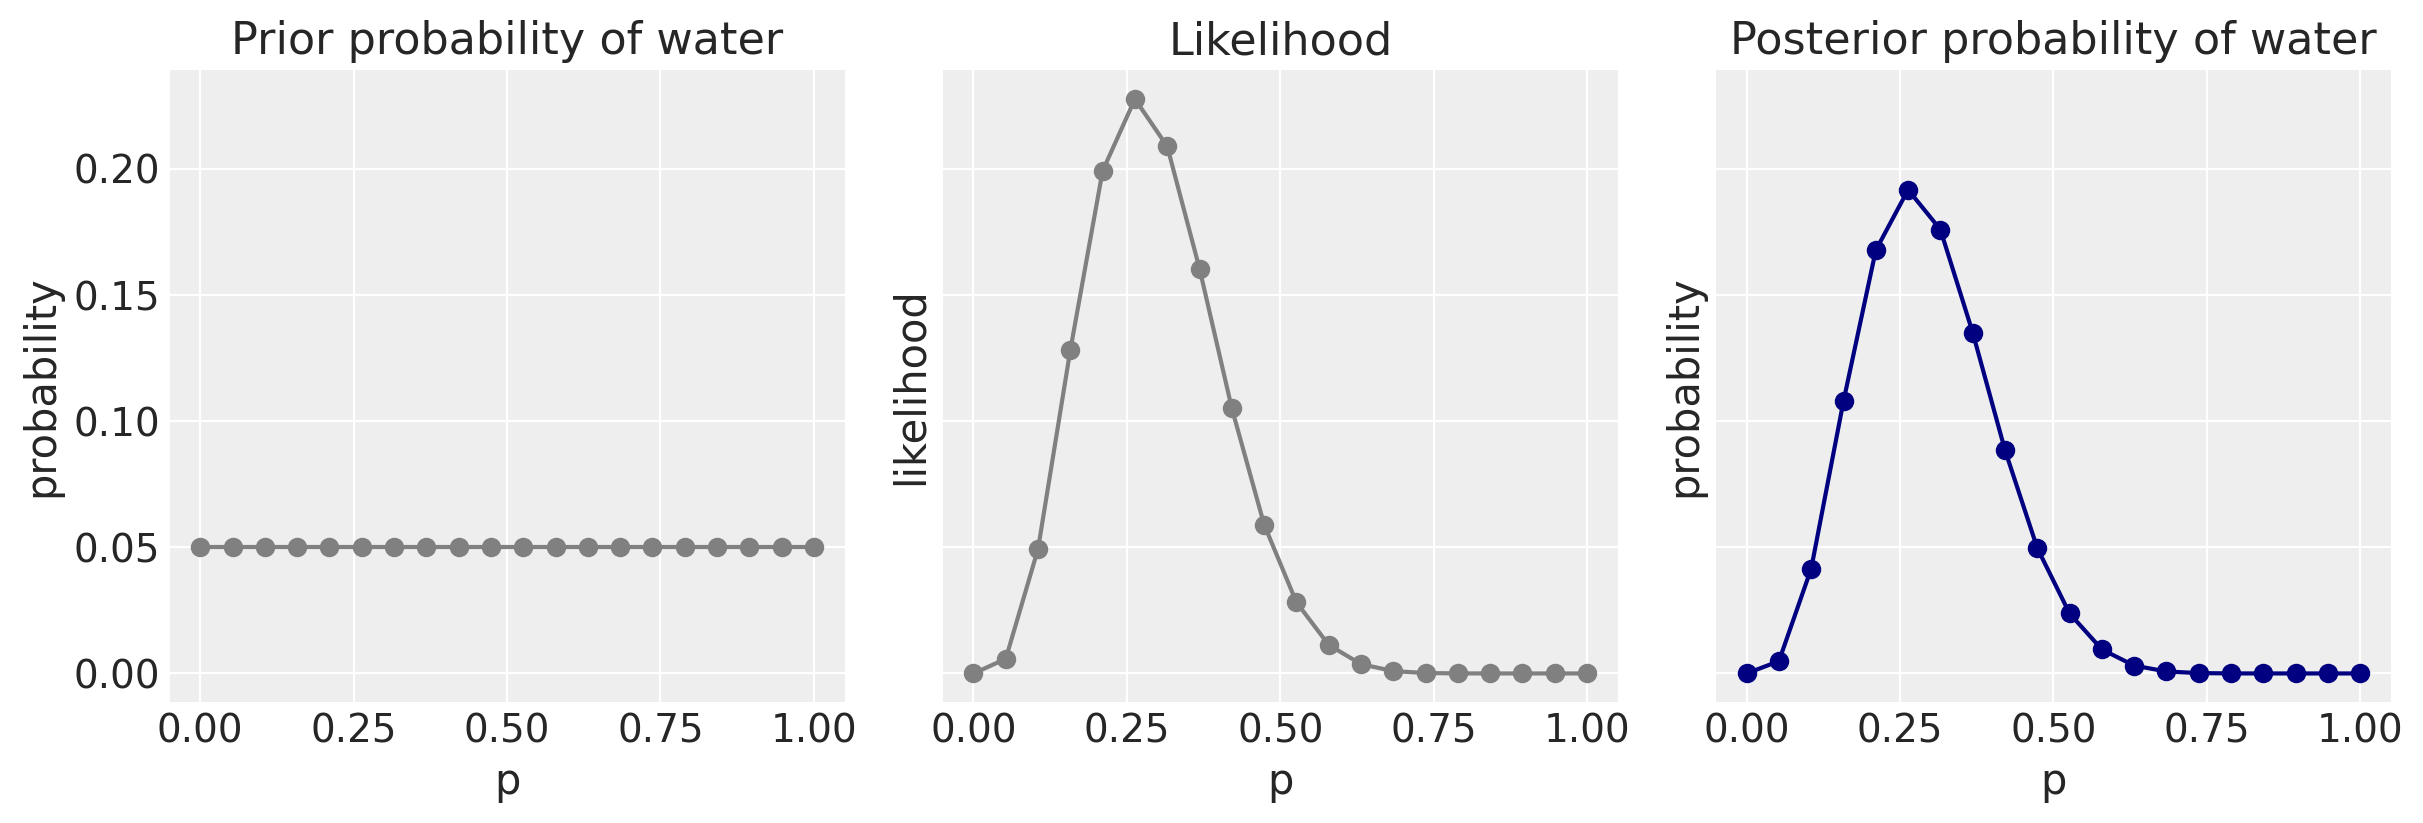

<IPython.core.display.Javascript object>

In [9]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
# prior
ax1.plot(p_grid, prior, '-o', color="gray")
ax1.set(xlabel='p', ylabel='probability', title='Prior probability of water')

# likelihood
ax2.plot(p_grid, lik, '-o', color="gray")
ax2.set(xlabel='p', ylabel='likelihood', title='Likelihood')

# posterior
ax3.plot(p_grid, posterior, '-o', color="navy")
ax3.set(xlabel='p', ylabel='probability', title='Posterior probability of water')

# Q2

Now suppose the data are 4 water and 2 land. Compute the posterior again, but this time use a prior that is zero below p = 0.5 and a constant above p = 0.5. This corresponds to prior information that a majority of the Earth’s surface is water.